# One dataset, many representations

After such a long lecture, it's time to put everything into practice! The first step will be to explore how one dataset can be represented in different ways, depending on the purpose of the visualization. We can choose the best visual channels (position, size, color) and marks (points, lines, areas) to use in our representation based on what we want to communicate. Throughout this tutorial we are going to keep asking ourselves the same questions: what is the purpose of the visualization? What are we achieving? Is it effective?


We are going to start from the basics, by loading numpy and pandas to work with our data, and matplotlib to create the plots.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The data we are going to use is the number of deaths per month since 2000 for comunas in Chile. (Comunas is the equivalent to cities in the US.) (This dataset is part of an effort by the Chilean Ministry of Health to make COVID-19 data publicly available.)

In [2]:
deaths_file = 'https://raw.githubusercontent.com/jorgeperezrojas/covid19-data/master/csv/muertes_deis/muertes_deis_rm.csv'
deaths_data = pd.read_csv(deaths_file, index_col=1)
deaths_data.head()

,comuna,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
año,,,,,,,,,,,,,
2020,Alhué,4.0,4.0,7.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,Alhué,2.0,NaN,5.0,3.0,2.0,6.0,2.0,NaN,4.0,3.0,4.0,5.0
2018,Alhué,1.0,2.0,2.0,8.0,1.0,5.0,1.0,4.0,8.0,6.0,3.0,NaN
2017,Alhué,3.0,4.0,2.0,4.0,3.0,3.0,1.0,2.0,6.0,1.0,2.0,2.0
2016,Alhué,5.0,NaN,1.0,2.0,1.0,3.0,4.0,2.0,1.0,4.0,5.0,4.0


### Exercise

Explore the file and think about what kind of graphs can be used to represent this data. If you are not feeling particularly inspired, you can use resources such as the [Data Viz Catalogue](https://datavizcatalogue.com), [Data Viz Project](https://datavizproject.com), or [Data to Viz](https://www.data-to-viz.com/index.html). Grab a piece of paper and a pen (or pencil) and sketch them. What are the advantages and disadvantages of the different plots? What are you trying to communicate?

# The default option: line plots

Obviously, the first one that came to my mind was a line plot: one line per year, months of the year on the x-axis, number of deaths on the y-axis, add a legend, and done. That's one example of _design fixation_, something that we already talked about. Intuitively, and because our blind adherence to preconceived concepts, we tend to think in terms of line plots, scatter plots, bar charts, and distributions. I was a bit dissapointed by my lack of creativeness, but whatever, let's go with it.

For this example we are going to focus on one single comuna, Cerro Navia. So we select the data corresponding to that comuna, and clean it up.

In [78]:
comuna = 'Cerro Navia'
filtered = deaths_data[deaths_data['comuna'] == comuna]
data = filtered.drop(['comuna'], axis=1)

We plot year by year using the routines included in pandas. Did you know that dataframes have plotting routines integrated into them? Yes! They have a large selection of line, bar charts (vertical and horizontal), histograms, boxplots, among others. You can find more about them [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot). We'll just go with the simplest one: a line plot.

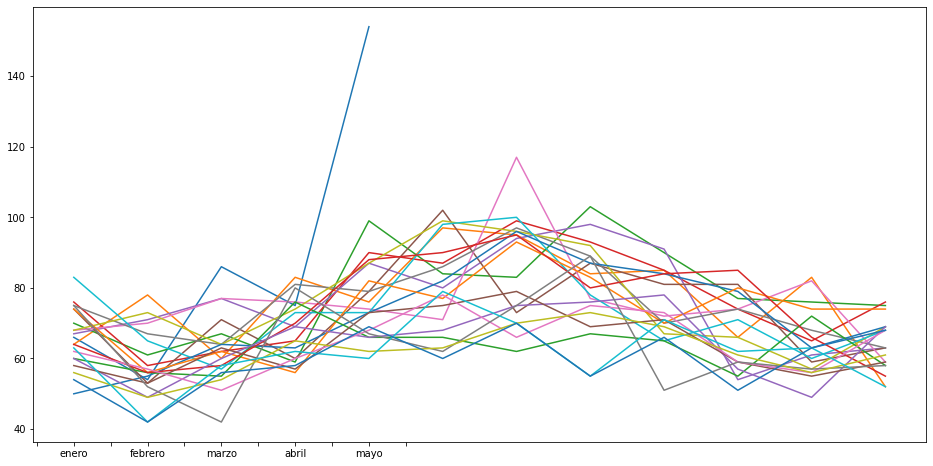

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(16,8))

for year in data.index:
    data.loc[year].plot.line(ax=ax)
    
plt.show()

**Take a few seconds to think about this plot: what are its advantages and disadvantages?**

Not my favorite plot, but it does the job of _presenting data_. We can already see a spike reaching more than 140 deaths, and a second one with around 120. Also, we can distinguish some drops in the months... wait, the labels are wrong, we need to fix them! (And maybe add a legend to identify the different years.)

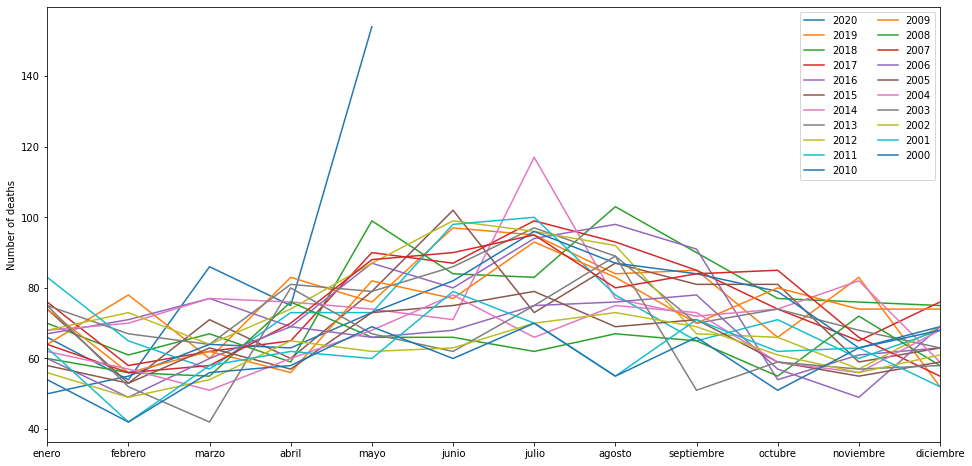

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(16,8))

for year in data.index:
    data.loc[year].plot.line(ax=ax , label=str(year))
    
ax.set_xlim(0,11)
ax.set_xticks(np.arange(0, 12))
ax.set_xticklabels(data_comuna.keys())
ax.set_ylabel("Number of deaths")
plt.legend(ncol=2)

plt.show()

**Do you see any improvement?**


Better, but still a bit messy. The highest spike might be 2000, 2010, or 2020 (you probably already know the answer), while the second one might be 2004 or 2014. Also the number of deaths drops between February and March but tend to increase between June, July, and August. Does this make sense? Indeed, those are Winter months in Chile! Cool, we are already learning something about the data!

Next, we are going to keep improving the colors for our lines. For that, we are going to use matplotlib colormaps. You can choose whatever colormaps suits your taste best. I'll go with viridis, which is my favorite one.

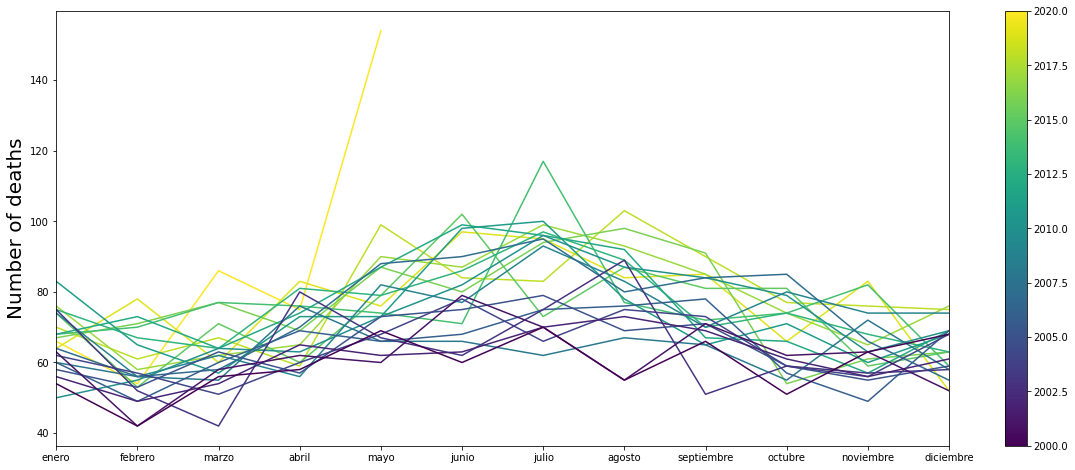

In [81]:
from matplotlib import cm
from matplotlib.colors import Normalize

min_year = np.min(deaths_data.index)
max_year = np.max(deaths_data.index)
    
viridis = cm.get_cmap('viridis')
norm = Normalize(vmin=min_year, vmax=max_year)

# Function that returns the color for a given year
def get_color(yr):
    color_number = (yr - min_year) / (max_year - min_year)
    return viridis(color_number)

fig, ax = plt.subplots(1, 1, figsize=(20,8))

for year in data_comuna.index:
    data_comuna.loc[year].plot.line(ax=ax , c=get_color(year))
    
ax.set_xlim(0,11)
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax)
ax.set_xticks(np.arange(0, 12))
ax.set_xticklabels(data_comuna.keys())
ax.set_ylabel("Number of deaths", fontsize=20)

plt.show()

### Exercise

Evaluate this plot. What are its advantages and disadvantages? How useful is the graph to identify trends (e.g. across months or years)? How easy is to identify the number of deaths for e.g. August 2012? What can you improve on this plot? Sketch it or try modifying it here.

# A second option: heatmap

A second option that came to my mind, and that is very common in astronomy although you might not recognize them as such, was [heatmaps](https://en.wikipedia.org/wiki/Heat_map). In this case they work well because one axis can be months, the other one years, and cell color can represent the number of deaths. This is analogous to what astronomers do when they create images from observations and/or simulations: for the axis they use x and y coordinates, and any spatial property (such as velocity or density) for cell colors.

For our heatmap, we are going to use seaborn, which is another Python plotting library In particular, it is very useful when working with Pandas dataframes. 

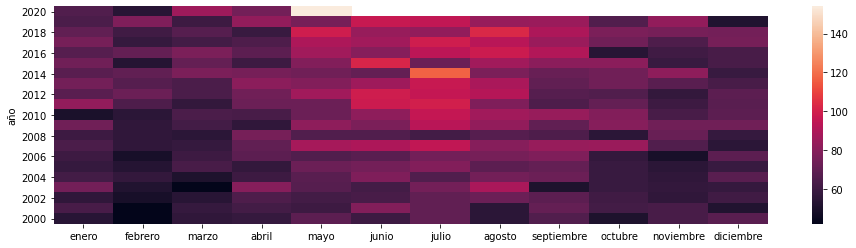

In [82]:
import seaborn as sns

plt.figure(figsize=(16,4))
sns.heatmap(data)

**Do you like it? Why, or why not? What would you change?**

This is already really nice! One thing that I don't like is the deafult colormap. Most of my attention goes to darker colors, so the very high peak from May 2020 gets lost when it's represent by a very bright color, which also gets blended into the white background. We could try to reverse the colormap or we could use a different colormap.

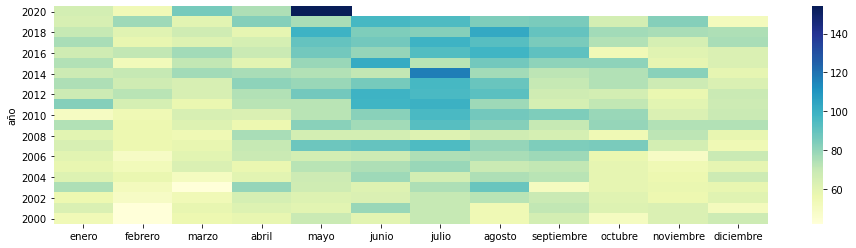

In [71]:
plt.figure(figsize=(16,4))
ax = sns.heatmap(data, cmap="YlGnBu")

### Exercise

Evaluate this plot. What are its advantages and disadvantages? How useful is the graph to regonize trends (e.g. across months or years)? How easy is to identify the number of deaths for August 2012? Is it more effective than the preivous one in communicating the raise in deaths due to COVID-19?

# Final comments

Both plots are different, each one of them has its advantages and disadvantages. Our final choice will depend on _our intention_, on _what we want to communicate_. If we want the user to be able to identify the exact number of deaths for a given month in a given year, line plots with grids might be better. But if we want the user to be able to see trends and identify, for example, that July 2014 had an abnormally high number of deaths, then maybe the heatmap works better. Intention is a big part of data visualization, as well as the audience that we want to reach.

### Exercise

Go back to the sketches you made at the beginning. Think about what you want to communicate in each case. What is your intended audience? What would the user be able to do with the plot? Feel free to make some of those plots using matplotlib or seaborn routines.